<a href="https://colab.research.google.com/github/saileshraturi/BreastCancerdiagnoseusingTensorFlow/blob/master/BreastCancerDiagnoseusingTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
#load dataset
from sklearn.datasets import load_breast_cancer

In [0]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data.data.shape

(569, 30)

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.target.shape

(569,)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
#Train Test split
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(data.data,data.target,test_size = 0.33)

In [0]:
N,D = X_train.shape

In [14]:
Y_train.shape

(381,)

In [0]:
# Scaling of Data
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
#Build the model
model  = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [0]:
#Another way of modelling
# model = tf.keras.model.Sequential()
#model.add(tf.keras.layes.Dense(1,input_Shape =(D,),activation = 'sigmoid'))

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [38]:
#Train the model
r = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 12ms/step - loss: 0.6954 - accuracy: 0.5932 - val_loss: 0.6239 - val_accuracy: 0.6862
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6378 - accuracy: 0.6614 - val_loss: 0.5736 - val_accuracy: 0.7394
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5877 - accuracy: 0.7192 - val_loss: 0.5302 - val_accuracy: 0.7766
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5438 - accuracy: 0.7585 - val_loss: 0.4930 - val_accuracy: 0.8138
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5054 - accuracy: 0.8058 - val_loss: 0.4606 - val_accuracy: 0.8245
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4722 - accuracy: 0.8241 - val_loss: 0.4328 - val_accuracy: 0.8404
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4435 - accuracy: 0.8478 - val_loss: 0.4087 - val_accuracy: 0.8457
Epoch 8/100


In [39]:
#evaluate the model
print("Trian_Score:",model.evaluate(X_train,Y_train))
print("Test_score:",model.evaluate(X_test,Y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.9790
Trian_Score: [0.09513556957244873, 0.9790025949478149]
6/6 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9574
Test_score: [0.11304876208305359, 0.957446813583374]


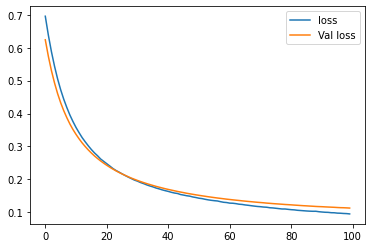

In [40]:
#Plot the object return by model.fit
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'Val loss')
plt.legend()

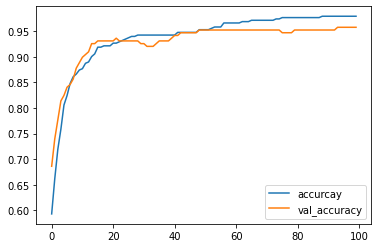

In [41]:
plt.plot(r.history['accuracy'],label = 'accurcay')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()